# Resting potential and membrane resistance

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
from neuron import h, gui
import Model

In [4]:
model = Model.without_ih()

In [5]:
# Some special place
middle_Bouton = model.boutons[model.axNum//2]

# Checking topology
s = h.Shape()
s.show(False)
s.color(2, sec=middle_Bouton)     # color middle_Bouton red
# h.topology()

0.0

In [6]:
sim_interval = 1000.

In [7]:
# Record voltage and time
v = h.Vector()          # Membrane potential vector [mV]
t = h.Vector()          # Time stamp vector [ms]
v.record(middle_Bouton(0.5)._ref_v)
t.record(h._ref_t) 

Vector[4]

In [8]:
h.tstop = sim_interval
h.run()

0.0

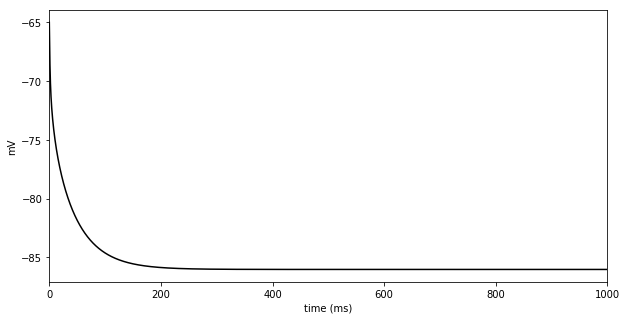

In [9]:
fig = plt.figure() 

plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t, v, color='black')
plt.xlim((0,sim_interval))   

plt.show()

In [10]:
print 'resting potential = ', v[-1], 'mV'    # last value recorded at the middle bouton

resting potential =  -86.0170247446 mV


In [11]:
imp = h.Impedance()
imp.loc(0.5, sec = middle_Bouton)
imp.compute(0)  # DC input R
R = imp.input(0.5)  
print 'input resistance = ', R, 'MOhm'

input resistance =  1950.47778721 MOhm
